In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

x1 = iris.data[0:50, 0:2] #data utk iris-setosa
x2 = iris.data[50:100, 0:2] #data utk iris-versicolor
x3 = iris.data[100:150, 0:2] #data utk iris-virginica

m1 = np.mean(x1, axis=0)
m2 = np.mean(x2, axis=0)
m3 = np.mean(x3, axis=0)
C1 = np.cov(x1.T)
C2 = np.cov(x2.T)
C3 = np.cov(x3.T)

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

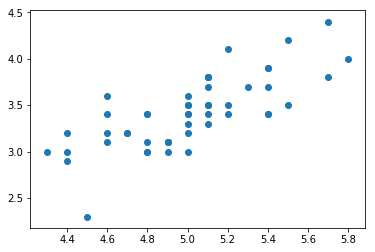

In [2]:
plt.scatter(x1[:,0],x1[:,1])

jika covarians antara 2 variabel tinggi maka bisa dikatakan kita bisa memprediksi nilai dari variabel terkait berdasarkan variabel terkait lainnya

## menggunakan model linear y = mx + c

In [5]:
x1[0:8,:]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4]])

In [8]:
c1 = x1[:,0]
mones = np.ones(50)
x = np.c_[c1, mones]
x.shape

(50, 2)

In [9]:
y = x1[:,1]
y.shape

(50,)

In [11]:
# matmul (matriks multiplication) artinya x transpose dikali y
r1 = np.matmul(x.T, y)
r2 = np.matmul(x.T, x)
r1.shape

(2,)

In [12]:
r2.shape

(2, 2)

In [13]:
# cari inverse : np.linalg.inv()
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)
b

array([ 0.80723367, -0.62301173])

maka dapat dikatakan m= 0.8072367, c = -0.62301173, sehingga modelnya menjadi y = 0.8072367x -0.62301173

In [14]:
xx = np.arange(0, 10, 0.05)
xx.shape

(200,)

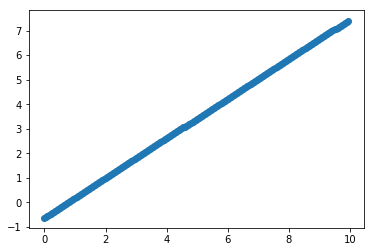

In [15]:
yy = b[0]*xx + b[1]
plt.scatter(xx, yy)

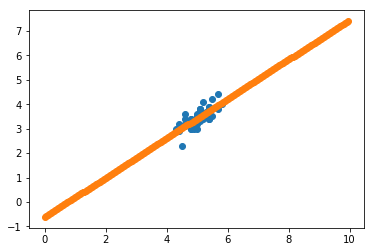

In [19]:
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(xx, yy)

## menggunakan model eksponesial/fungsi kuadratik y = ax^2+bx+c
mendekati sebaran data menggunakan fungsi kuadratik

In [20]:
c1 = x1[:,0]
sqc1 = np.square(c1)
mones = np.ones(50)
x = np.c_[sqc1, c1, mones]
y = x1[:,1]
r1 = np.matmul(x.T,y)
r2 = np.matmul(x.T,x)
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)
b

array([ 0.16582985, -0.85979347,  3.54623206])

sehingga bentuk modelnya menjadi y = 0.16582985x^2 - 0.85979347 + 3.54623206

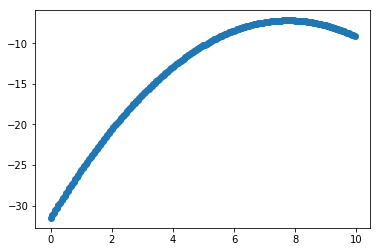

In [26]:
xx = np.arange(0,10,0.05)
yy = b[0]*xx*xx + b[1]*xx + b[2]
plt.scatter(xx, yy)

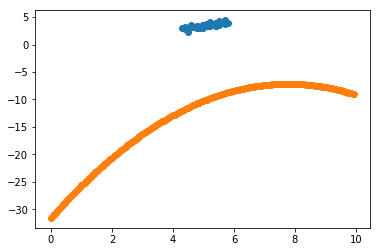

In [27]:
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(xx, yy)

## didekati dengan model pangkat 3

In [23]:
c1 = x1[:,0]
cbc1 = c1*c1*c1
mones = np.ones(50)
x = np.c_[cbc1, sqc1, c1, mones]
y = x1[:,1]
r1 = np.matmul(x.T,y)
r2 = np.matmul(x.T,x)
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)
b

array([ -0.40357418,   6.270412  , -31.50946402,  54.62270882])

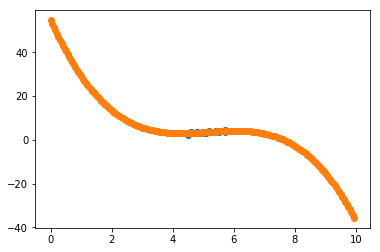

In [36]:
xx = np.arange(0,10,0.05)
yy = b[0]*xx*xx*xx + b[1]*xx*xx + b[2]*xx + b[3]
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(xx, yy)

buat regresi dari petal length, petal width, sepal length

In [39]:
x1 = iris.data[0:50, 0:3]
print(x1)

[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.1 1.5]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]]


In [40]:
c1 = x1[:,0]
c2 = x1[:,1]
mones = np.ones(50)
x = np.c_[c1, c2, mones]
y = x1[:,2]
r1 = np.matmul(x.T,y)
r2 = np.matmul(x.T,x)
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)
b

array([ 0.14681235, -0.02096263,  0.80070765])

In [ ]:
xx = np.arange(0,10,0.05)
xx1 = 

## Menggunakan fungsi di python utk linear regression
tanpa perlu menghitung manual inverse matriks dan sebagainya

In [45]:
c1 = x1[:,0]
c2 = x1[:,1]
mones = np.ones(50)
x = np.c_[c1, c2, mones]
x.shape

(50, 3)

In [46]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

linreg = linear_model.LinearRegression()
y = x1[:,2]
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
linreg.coef_

array([ 0.14681235, -0.02096263,  0.        ])

In [48]:
linreg.fit(x,y, normalize=True)

TypeError: fit() got an unexpected keyword argument 'normalize'

## Membuat regression dengan Ridge regression

In [49]:
from sklearn.linear_model import Ridge
ridreg = Ridge(alpha = 1.0)
ridreg.fit(x,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
ridreg.coef_

array([0.10801529, 0.00512067, 0.        ])

In [51]:
ridreg = Ridge(alpha = 2.0)
ridreg.fit(x,y)
ridreg.coef_

array([0.08866005, 0.01499608, 0.        ])

semakin tinggi alpha maka semakin ketat aturan sehingga semakin dipaksa untuk nilai koefisiennya itu mendekati 0 (sangat kecil)
makin rendah nilai alpha maka akan semakin bebas

In [58]:
m1 = np.mean(x1, axis = 0)
m1
# c1 = x1[:,0]
# y = x1[:,2]
# c1 = x1[:,0] - m1[0]
# y = x1[:,2] - m1[2]
# x = np.c_[c1]
# linreg.fit(x,y)

3.296

selain linreg dan ridge bisa menggunakan lasso

## Regresi Logistik

In [59]:
iris.data[45:55,:]

array([[4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5]])

In [60]:
iris.target[44:55]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [61]:
from sklearn.linear_model import LogisticRegression
x1 = iris.data[0:100, 0:2]
m1 = np.mean(x1, axis = 0)
m1

array([5.471, 3.094])

In [68]:
c1 = x1[:,0] - m1[0]
c2 = x1[:,1] - m1[1]
y = iris.target[0:100]
x = np.c_[c1,c2]
logreg = LogisticRegression(C=1e5, solver='lbfgs')
logreg.fit(x,y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [70]:
logreg.predict([[5.0,0.2]])

array([1])

In [71]:
logreg.predict([[3.0,7.0]])

array([0])